In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
HTML('''
<script>
    function toggleCodeCells() {
      var codeCells = document.querySelectorAll('.jp-CodeCell');

      codeCells.forEach(function(cell) {
        var inputArea = cell.querySelector('.jp-InputArea');
        if (inputArea) {
          var currentDisplay = inputArea.style.display || getComputedStyle(inputArea).display;
          inputArea.style.display = currentDisplay === 'none' ? '' : 'none';
        }
      });
    }
</script>

<!-- Add a button to toggle visibility of input code cells -->
<button onclick="toggleCodeCells()">Toggle Code Cells</button>
''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

## Syllabus

1. Probabilities and interpretations
2. Probability distributions
3. **Parameter estimation**
4. Maximum likelihood
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. Hypothesis testing
9. Probability and confidence level
10. Limit setting
11. Introduction to multivariate analysis techniques

# Chapter 3

## Topics

**[3.1 Law of large numbers and central limit theorem](#3.1-Law-of-large-numbers-and-central-limit-theorem)**
- 3.1.1 The law of large numbers
- 3.1.2 The central limit theorem
- **Case study**: Wizard trick

**[3.2 Parameter estimation](#3.2-Parameter-estimation)**
- 3.2.1 Definition
- 3.2.2 Properties
- 3.2.3 Some basic estimators

## Further Reading Material

- **Cowan**: Chapter 2.5 - *Central limit theorem*
- **Barlow**: Chapter 4.1 - *Central limit theorem*
- **Cowan**: Chapter 5 - *General concepts of parameter estimation and law of large numbers*
- **Barlow**: Chapter 5.1.1 - *Properties of estimators*

## 3.1 Law of large numbers and central limit theorem

### 3.1.1 The law of large numbers

_[This subsection follows from Cowan, Section 5.2]_

```
In probability theory, the law of large numbers (LLN) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.
```
<div style="text-align: right">(<a href="https://en.wikipedia.org/wiki/Law_of_large_numbers">Wikipedia - Law of large numbers</a>)</div>

The law of large numbers essentially says that:

\begin{equation}
  \langle X_N \rangle = \frac{1}{N} \sum_{i=1}^{N} X_i \to \mu \quad {\rm for} \quad N \to \infty \,.
\end{equation}

That is, **the sample mean tends to the population mean when the sample size tends to infinity**.

There are two versions of the law. We state them below, but will not attempt to prove them in this course.

##### Weak law of large numbers

\begin{equation}
    \lim_{N \to \infty} P\left( \left| \langle X_N \rangle - \mu \right| > \epsilon \right) = 0 \,.
\end{equation}

##### Strong law of large numbers

\begin{equation}
    P\left( \lim_{N \to \infty} \langle X_N \rangle = \mu \right) = 1 \,.
\end{equation}



### 3.1.2 The central limit theorem

_[This subsection follows from Cowan, Section 10.3, Barlow, Section 4.1 and Appendix 2]_

```
In probability theory, the central limit theorem (CLT) establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed.
```
<div style="text-align: right">(<a href="https://en.wikipedia.org/wiki/Central_limit_theorem">Wikipedia - Central limit theorem</a>)</div>

The central limit theory essentially says that:

\begin{equation}
    \lim_{N \to \infty} \frac{1}{s_N} \sum_{i=1}^N \left( X_i - \mu_i \right) \xrightarrow{d} \mathcal{N}(0,1) \quad ,
\end{equation}

where the symbol $\xrightarrow{d}$ means *convergence in distribution*, and with

\begin{equation}
    s_N^2 = \sum_{i=1}^N \sigma_i^2 \quad .
\end{equation}

*Note: convergence in distribution means that repeating the sum from the left hand side multiple times using a different set of random variables $X_i$ would yield values that distribute like the normal distribution on the right hand side.*

Proving the CLT theorem is beyond the scope of this course and we refer to the aforementioned material for more information. However, it is useful to analyse the implication of this theorem in more details.

A more intuitive way to write the CLT would be the following:

\begin{equation}
    \lim_{N \to \infty} \sum_{i=1}^N X_i \xrightarrow{d} \mathcal{N}(\mu_N,s_N^2) \quad ,
\end{equation}

with

\begin{equation}
    \mu_N = \sum_{i=1}^N \mu_i \quad ,
\end{equation}

and

\begin{equation}
    s_N^2 = \sum_{i=1}^N \sigma_i^2 \quad .
\end{equation}

In other words, the sum of a large number of random variates should distribute as a normal distribution with a mean equal to the sum of the means from which the random variates are drawn, and a variance equal to the sum of the variances from which the random variates are drawn.

In the case of random variates that all have the same mean and variance (i.e. $\mu_i = \mu$ and $\sigma_i^2 = \sigma^2$), we have

\begin{equation}
    \lim_{N \to \infty} \sum_{i=1}^N X_i \xrightarrow{d} \mathcal{N}(N\mu,N\sigma^2) \quad .
\end{equation}

The CLT is a fundamental concept as it justifies the use of the normal distribution to deal with a wide range of problems when the number of random variables is large. As we will see, for example, with posterior estimation and Bayesian inference, the mathematical properties of the Gaussian function (differentiability and integrability, Fourier transform, etc) become extremely useful.

For more about the CLT, have a look at this nice illustrated article and video on [Introduction to Statistics for Data Science](https://medium.com/diogo-menezes-borges/introduction-to-statistics-for-data-science-a67a3199dcd4).

### Case study: Wizard trick

Is it possible to turn random numbers drawn from a uniform distribution into a normal distribution?

<span style="text-decoration: underline">Case 1:</span> Imagine you draw 10,000 numbers from a uniform distribution in the range $[0,1[$.

<span style="text-decoration: underline">Case 2:</span> Imagine you draw another 10,000 uniform numbers just like above and add pairs together.

<span style="text-decoration: underline">Case 3:</span> Imagine you draw another 10,000 uniform numbers and add them to the previous pairs.

<span style="text-decoration: underline">Case 4:</span> Imagine you draw another 7 sets of 10,000 uniform numbers just like above and add them to the tripplets in order to have the sum of 10 uniform numbers.

What does the distribution of each case look like?

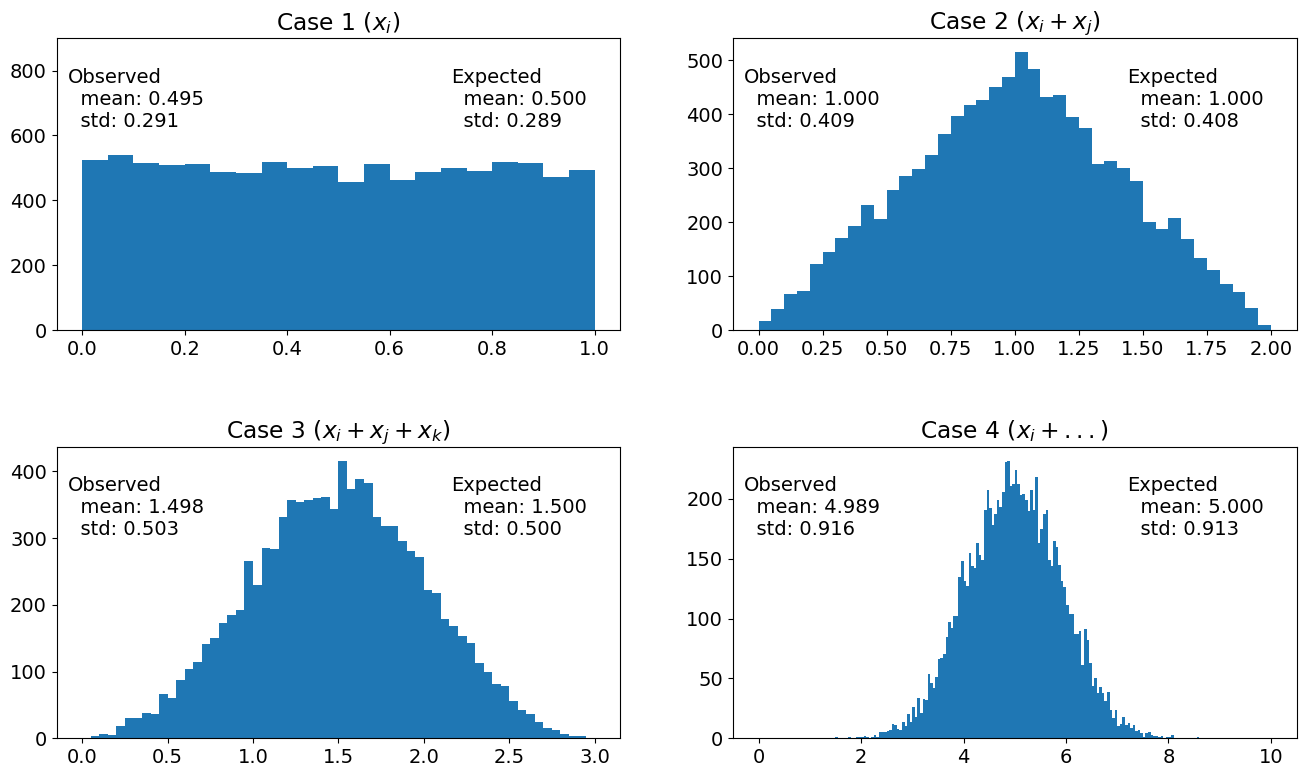

In [3]:
## We generate sets of random numbers drawn from a uniform distribution in the range [0,1[.
uniform_sets = np.random.uniform(size=(10,10000))

mu1 = uniform_sets[0].mean()
mu2 = uniform_sets[:2].sum(0).mean()
mu3 = uniform_sets[:3].sum(0).mean()
mu10 = uniform_sets.sum(0).mean()
std1 = uniform_sets[0].std()
std2 = uniform_sets[:2].sum(0).std()
std3 = uniform_sets[:3].sum(0).std()
std10 = uniform_sets.sum(0).std()

fig,ax = plt.subplots(2, 2, figsize=[16,10])
_ = ax[0,0].hist(uniform_sets[0], bins=20, range=[0,1])
_ = ax[0,1].hist(uniform_sets[:2].sum(0), bins=40, range=[0,2])
_ = ax[1,0].hist(uniform_sets[:3].sum(0), bins=60, range=[0,3])
_ = ax[1,1].hist(uniform_sets.sum(0), bins=200, range=[0,10])
_ = ax[0,0].set_title('Case 1 ($x_i$)'.format(mu1, std1))
_ = ax[0,1].set_title('Case 2 ($x_i + x_j$)'.format(mu2, std2))
_ = ax[1,0].set_title('Case 3 ($x_i + x_j + x_k$)'.format(mu3, std3))
_ = ax[1,1].set_title('Case 4 ($x_i + ...$)'.format(mu10, std10))
_ = ax[0,0].text(0.02, 0.9, 'Observed\n  mean: {:.3f}\n  std: {:.3f}'.format(mu1 , std1 ), transform=ax[0,0].transAxes, size=14, verticalalignment='top')
_ = ax[0,1].text(0.02, 0.9, 'Observed\n  mean: {:.3f}\n  std: {:.3f}'.format(mu2 , std2 ), transform=ax[0,1].transAxes, size=14, verticalalignment='top')
_ = ax[1,0].text(0.02, 0.9, 'Observed\n  mean: {:.3f}\n  std: {:.3f}'.format(mu3 , std3 ), transform=ax[1,0].transAxes, size=14, verticalalignment='top')
_ = ax[1,1].text(0.02, 0.9, 'Observed\n  mean: {:.3f}\n  std: {:.3f}'.format(mu10, std10), transform=ax[1,1].transAxes, size=14, verticalalignment='top')
_ = ax[0,0].text(0.7, 0.9, 'Expected\n  mean: {:.3f}\n  std: {:.3f}'.format(0.5 , 1/np.sqrt(12)), transform=ax[0,0].transAxes, size=14, verticalalignment='top')
_ = ax[0,1].text(0.7, 0.9, 'Expected\n  mean: {:.3f}\n  std: {:.3f}'.format(1.0 , np.sqrt(2/12)), transform=ax[0,1].transAxes, size=14, verticalalignment='top')
_ = ax[1,0].text(0.7, 0.9, 'Expected\n  mean: {:.3f}\n  std: {:.3f}'.format(1.5 , np.sqrt(3/12)), transform=ax[1,0].transAxes, size=14, verticalalignment='top')
_ = ax[1,1].text(0.7, 0.9, 'Expected\n  mean: {:.3f}\n  std: {:.3f}'.format(5.0 , np.sqrt(10/12)), transform=ax[1,1].transAxes, size=14, verticalalignment='top')
_ = ax[0,0].set_ylim(0,900)
_ = fig.subplots_adjust(0.125, 0.2, 0.9, 0.9, 0.2, 0.4)


<span style="text-decoration: underline">Lesson 1:</span>
> As expected, the Case 1 scenario is just a flat distribution with mean $\mu=0.5$ and variance equal to $\sigma^2=1/12$ (_can you calculate them?_). For the other cases, according to the CLT, the predicted mean should be $\mu_N=N\mu = N/2$ and the standard deviate $s_n = \sqrt{N\sigma^2} = \sqrt{N/12}$. The experiment agrees remarkably well with the prediction.

<span style="text-decoration: underline">Lesson 2:</span>
> The other important prediction of CLT is that the distribution will increasingly resemble a Gaussian as the number of summed random variables increases. This is clearly the case as we go from a uniform distribution in Case 1, to a triangular distribution in Case 2, to something more rounded in Case 3, to a very Gaussian looking one in Case 4. _As a side note, each distribution can be computed exactly: they are the convolution of $N$ top-hat functions. Something to remember when you do convolutions later in another course..._

<span style="text-decoration: underline">Lesson 3:</span>
> The mean and standard deviations only depend on the number of random variables that are summed. However, how close the observed values agree with the expected values relies on another principle... the law of large numbers.

It is almost magical... we have have turned flat numbers into a normal distribution.

## 3.2 Parameter estimation

_[This section follows from Barlow, Chapter 5, and Cowen, Chapter 5.]_

_'Estimator'_ in the context of statistics means a precise, accurate procedure to calculate a given quantity based on random variates. This is not to be confused with _'approximation'_.

Estimation means that you have a dataset from which you want to evaluate a specific quantity/function and produce a reliable value for it. The measures of central tendency and of dispersion, and the other indicators that we have seen in Chapter 1 can all be considered to be estimators. In that sense, any function/operation applied to a dataset which returns a specific value is an estimator.

#### Expectation values

Central to estimation is the concept of expectation of a function $a(x)$ under a certain normalised probability distribution $\mathcal{L}(x)$ which describes how likely each underlying $x$ value is. In the continuous case:

\begin{equation}
  E\left[ a(x) \right] = \int_\Omega a(x) \mathcal{L}(x) {\rm d}x \,.
\end{equation}

In the discrete case:

\begin{equation}
  E\left[ a(x) \right] = \sum_i^N a(x_i) \mathcal{L}(x_i) \,.
\end{equation}

_Note: In the current context the expectation value is synonym to the arithmetic mean and so for all intents and purposes $\langle a \rangle = E \left[a\right]$._

#### Common formulas involving expectation values

Here are some basic properties involving the expectation value and variance. We define $X$ and $Y$ as _independent and uncorrelated_ variates, $\alpha$ as a constant, and recalling $V(X)$ the variance of $X$:

- $E\left[\alpha+X\right] = \alpha + E\left[X\right]$
- $E\left[\alpha X\right] = \alpha E\left[X\right]$
- $E\left[X+Y\right] = E\left[X\right] + E\left[Y\right]$
- $E\left[XY\right] = E\left[X\right] E\left[Y\right]$


- $V(X) = E\left[\left(X - E\left[X\right]\right)^2\right] = E\left[X^2\right] - E\left[X\right]^2$
- $V(\alpha + X) = V(X)$
- $V(\alpha X) = \alpha^2 V(X)$
- $V(X+Y) = V(X-Y) = V(X)+V(Y)$
- $V(XY) = E\left[X^2\right] E\left[Y^2\right] - E\left[X\right]^2 E\left[Y\right]^2$

### 3.2.1 Definition

**Estimator**: procedure that is applied to random variates and gives a numeric value for a parameter and/or a property of the parent population/distribution from which these variates are sampled. _[Barlow, Chapter 5]_

<div class="example">Example 1</div>

Suppose you want to find the average height of Physics and Astronomy students at Manchester. Here are 8 possibles options:

1. Add up all the heights and divide by N.
2. Add up a set of 10 heights and divide by 10.
3. Add all the heights and divide by N - 1.
4. Throw away the data and give the answer as 180 cm.
5. Multiply all the heights and take the Nth root (i.e. geometric mean).
6. Choose the most common height (i.e. the mode).
7. Add the tallest and shortest heights, and divide by 2.
8. Add up the second, fourth, sixth, etc., heights and divide by N/2 for N even, and (N-1)/2 for N odd.

### 3.2.2 Properties

An estimator can be 'good' or 'bad'. The difference between them is that a good estimator fulfills the following criteria:

1. Consistent
2. Unbiased
3. Efficient

#### Consistent

_An estimator is consistent_ if it tends to the true value as the number of data values tends to infinity:

\begin{equation}
  \lim_{N \to \infty} \widehat{a} = a \,.
\end{equation}

In light of this, the other way to consider the consistent requirement is that the variance of the estimator must tend to zero as $N$ tends to infinity, i.e. the error on measuring the mean becomes null:

\begin{equation}
  \lim_{N \to \infty} V(\widehat{a}) = 0 \,.
\end{equation}

<div class="example">Example 1</div>

From the previous example, we can show that Option 1 is consistent:

\begin{equation}
  \widehat{\mu} = \frac{X_1 + X_2 + X_3 + \dots + X_N}{N} = \langle X \rangle \,,
\end{equation}

since for $N \to \infty$ the law of large unmbers ensures that $\langle X \rangle \to \mu$.

Alternatively

\begin{eqnarray}
    V(\widehat{\mu}) &=& V\left(\frac{X_1 + X_2 + X_3 + \dots + X_N}{N}\right) \\
                 &=& \frac{1}{N^2} \left( V(X_1) + V(X_2) + V(X_3) + \dots + V(X_N) \right) \\
                 &=& \frac{1}{N^2} N V(X) \\
                 &=& \frac{V(X)}{N} \\
\end{eqnarray}

We can see that $\lim_{N \to \infty} V(\widehat{a}) = 0$.

#### Unbiased

_An estimator is unbiased_ if its expectation value is equal to the true value:

\begin{equation}
  E\left[ \widehat{a} \right] = a \,.
\end{equation}

<div class="example">Example 1</div>

From the previous example, we can show that Option 1 is unbiased:

\begin{eqnarray}
  E \left[ \widehat{\mu} \right] &=& E\left[ \frac{X_1 + X_2 + X_3 + \dots + X_N}{N} \right] \\
                               &=& \frac{E\left[X_1\right] + E\left[X_2\right] + E\left[X_3\right] + \dots + E\left[X_N\right]}{N} \\
                               &=& \frac{N E\left[X\right]}{N} \\
                               &=& \mu \,.
\end{eqnarray}

#### Efficient

_An estimator is efficient_ if its variance is small.

Given two estimators that are both consistent and unbiased, the one that produced the variance that is smaller is most likely closer to the true value and therefore better.

<div class="example">Example 1</div>

From the previous example, we can show that Option 1 is efficent using the variance:

\begin{equation}
  V(\widehat{\mu}) = \frac{\sigma^2}{N} \,.
\end{equation}

This directly follows from the central limit theorem. Note that here $\sigma$ is the standard deviation of a single measurement, while $V(\widehat{\mu})$ is the variance of the mean; the square root of which is known as the standard deviation of the mean.

### 3.2.3 Some basic estimators

<div class="example">Example 1: Variance with known mean</div>

Let us first consider the _estimate of the variance_ as an estimator, with the case where the true mean $\mu$ is known:
\begin{equation}
  \widehat{V(X)} \equiv \widehat{\sigma^2} = \frac{1}{N} \sum (X_i - \mu)^2 \,.
\end{equation}

We can show that this is an **unbiased estimator**.

To show that this estimator is unbiased implies that $E\left[ \widehat{\sigma^2} \right] = \sigma^2$. We can verify that this is the case:
\begin{eqnarray}
  E\left[ \widehat{\sigma^2} \right] &=& E\left[ \frac{1}{N} \sum (X_i - \mu)^2 \right] \\
                                     &=& \frac{1}{N} \sum E\left[ \left(X_i - \mu \right)^2 \right] \\
                                     &=& \frac{1}{N} \sum V(X_i) \quad \textrm{by the definition of variance} \\
                                     &=& \frac{1}{N} N \sigma^2 = \sigma^2 \,.
\end{eqnarray}

We can also show that this is a **consistent estimator**.

To show that this estimator is consistent implies that $\lim_{N \to \infty} V(\widehat{\sigma^2}) = 0$.

\begin{eqnarray}
  V(\widehat{\sigma^2}) &=& V \left( \frac{1}{N} \sum (X_i - \mu)^2 \right) \\
                        &=& \frac{1}{N^2} V \left( \sum (X_i - \mu)^2 \right) \\
                        &=& \frac{1}{N^2} \sum V (X_i - \mu)^2 \\
                        &=& \frac{1}{N^2} \left( \sum E\left[ (X_i - \mu)^4 \right] - \sum E\left[ (X_i - \mu)^2 \right]^2 \right) \\
                        &=& \frac{1}{N^2} \left( \sum 3\sigma^4 - \sum (\sigma^2)^2 \right) \quad \textrm{see note below} \\
                        &=& \frac{1}{N^2} \sum 2 \sigma^4 \\
                        &=& \frac{1}{N^2} 2N\sigma^4 \\
                        &=& \frac{2\sigma^4}{N}
\end{eqnarray}

In the limit of $N \to \infty$, this equation will clearly go to zero, which proves that this estimator is consistent. (*see Cowan Section 5.2*)

*Note that in the above we have assumed the data are normally distributed, in which case we can use the kurtosis identity:*
\begin{eqnarray}
    \kappa &=& \frac{E\left[ (X_i - \mu)^4 \right]}{\sigma^4} - 3 \\
           &=& 0 \quad \textrm{for a Gaussian} \\
   &\therefore{}& E\left[ (X_i - \mu)^4 \right] = 3\sigma^4
\end{eqnarray}

*Also note that the above result would still stand even if we did not assume the data are normally distribution.*

<div class="example">Example 2: Variance with unknown mean</div>

Let us now consider the variance for the case where the true mean $\mu$ is unknown and instead replaced by the sample mean, i.e. the estimate $\widehat{\mu} = \langle x \rangle$. This is in fact the uncorrected sample variance:

\begin{equation}
  \widehat{V(x)} \equiv \widehat{s^2_{\rm uncorr}} = \frac{1}{N} \sum \left(X_i - \langle X \rangle\right)^2 \,.
\end{equation}

We can show that this is a **biased estimator** as:

\begin{eqnarray}
  E\left[ \widehat{s^2_{\rm uncorr}} \right] &=& \frac{1}{N} E\left[ \sum (X_i - \langle X \rangle )^2 \right] \\
                                 &=& \frac{1}{N} E\left[ \sum \left(X_i^2 - 2X_i\langle X \rangle + \langle X \rangle^2 \right) \right] \\
                                 &=& \frac{1}{N} \sum \left( E\left[X_i^2\right] - E\left[2X_i\langle X \rangle\right] + E\left[\langle X \rangle^2\right] \right) \\
                                 &=& \frac{1}{N} \sum \left( E\left[X^2\right] - 2\langle X \rangle E\left[X_i\right] + \langle X \rangle^2 \right) \quad \dagger \\
                                 &=& \frac{1}{N} \sum E\left[ X^2 - \langle X \rangle^2 \right] \\
                                 &=& \frac{N}{N} E\left[ (X^2 - \mu^2) - (\langle X \rangle^2 - \mu^2) \right] \\
                                 &=& V(X) - V(\langle X \rangle) \\
                                 &=& V(X) - V(X)/N \quad \dagger\dagger \\
                                 &=& \frac{N-1}{N} V(X) \neq V(X)
\end{eqnarray}

*Notes:*<BR>
- $\dagger$: $\langle X \rangle\ = E\left[X\right]$ is a constant. Also, $E\left[X_i\right] = E\left[X\right]$ since all $X_i$ are from the same population.<BR>
- $\dagger\dagger$: We used the CLT for $V(\langle X \rangle) = V(X)/N$

This result demonstrates that the variance (as defined in the problem with a $1/N$ factor) is biased if the true mean is unknown. We could however redefine it using a $N/(N-1)$ correction factor, which would enable us to obtain a satisfactory estimator:

\begin{equation}
  \widehat{V(X)} \equiv \widehat{s^2_{\rm corr}} = \frac{1}{N-1} \sum (X_i - \langle X \rangle)^2 \,.
\end{equation}

This is the unbiased sample variance that we have seen in the first week! The correction factor is known as **Bessel's correction**.

_Note: Using the same argument as above one can show that both biased and unbiased sample variances are **consistent estimators**._

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>